## Importaciones

In [38]:
import numpy as np
import numpy.linalg as linear_algebra
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from numpy import ndarray

## Funciones útiles para el notebook

In [23]:
def print_vector (vector: ndarray) -> None:
  print(f"VECTOR    => {vector}")
  print(f"SIZE      => {vector.size}")
  print(f"DIMENSION => {vector.ndim}")

def show_vector_2d (v1: ndarray, v2: ndarray) -> None:
  xs, ys = zip( v1, v2 )
  plt.scatter( xs,ys, color=['r','b'] )
  def_axis(v1,v2)
  plt.grid()
  plt.show()

def def_axis( v1:ndarray, v2:ndarray ):
  xs, ys = zip( v1, v2 )
  plt.axis( [ 
    min(0, min(xs) - 1), 
    max(xs) + 1, 
    min(0, min(ys) - 1), 
    max(ys) + 1]   )
  
def show_vector_2d_like_arrows (vector: ndarray, origin=[0,0], **kwargs):
  return plt.arrow(
    origin[0],
    origin[1],
    vector[0],
    vector[1],
    head_width=0.2,
    head_length=0.3,
    length_includes_head = True,
    **kwargs)

## Vectores 2D

VECTOR    => [1 2]
SIZE      => 2
DIMENSION => 1


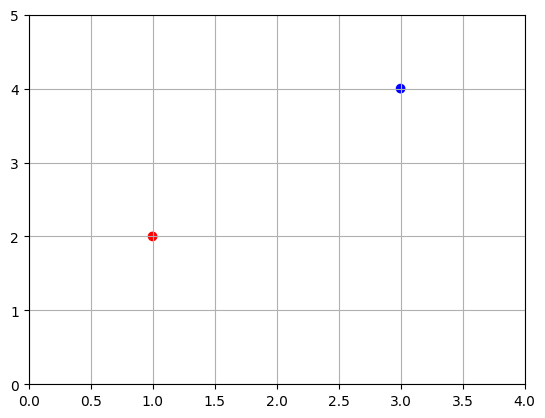

In [24]:
v1 = np.array( [ 1, 2 ] )
v2 = np.array( [ 3, 4 ] )

print_vector(v1)
show_vector_2d(v1,v2)

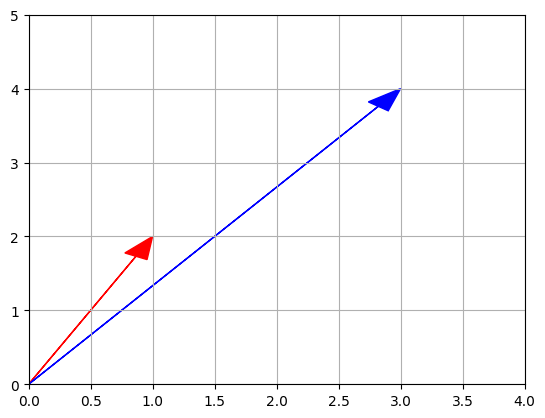

In [26]:
show_vector_2d_like_arrows( vector=v1, color='r' )
show_vector_2d_like_arrows( vector=v2, color='b' )
def_axis(v1,v2)
plt.grid()
plt.show()

## Vectores 3D

In [30]:
v1 = np.array( [1,2,3] )
v2 = np.array( [6,7,8] )

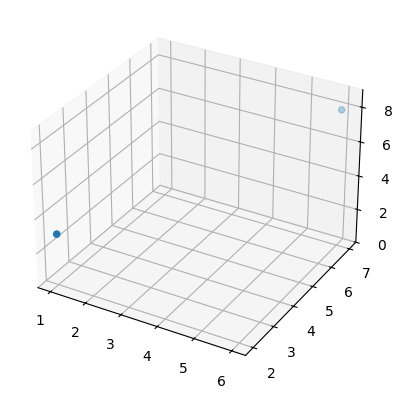

In [31]:
subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(v1,v2)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

Para mejorar la visualización y saber dónde están los puntos en el espacio se agregarán algunas líneas verticales y horizontales

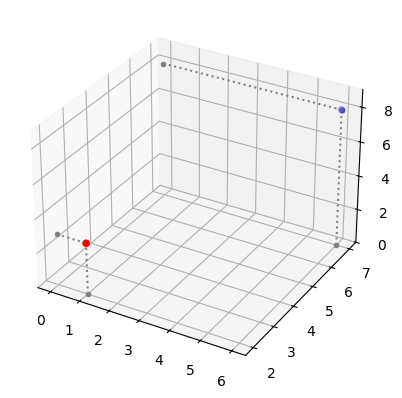

In [32]:
def plot_vectors3d(ax, vectors3d: list[ndarray], z0, **options):
  for v in vectors3d:
    x, y, z = v
    ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    ax.plot([0,x], [y,y], [z, z], color="gray", linestyle='dotted', marker=".")
  x_coords, y_coords, z_coords = zip(*vectors3d)
  ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [v1,v2], 0, color=("r","b"))
plt.show()

## Norma

La norma de un vector $v$, denotada como $|| v ||$, es una medida de la longitud de $v$. Existen múltiples normas posibles, pero una de las más conocidas es: norma euclidiana, que se define como:
$$ || v || = \sqrt{ \sum_i u_i^2 }  $$


In [34]:
# Posibles implementaciones para la norma euclidiana
def norma_using_list_comprenssion (v: ndarray):
  return sum ( [i**2 for i in v] )**0.5

def norma_using_numpy (v: ndarray):
  return linear_algebra.norm(v)

In [37]:
v1 = [ 2, 5 ]
v2 = [ 3, 5 ]
v3 = [ 1, 1, 1 ]

assert norma_using_list_comprenssion(v1) == norma_using_numpy(v1)
assert norma_using_list_comprenssion(v2) == norma_using_numpy(v2)
assert norma_using_list_comprenssion(v3) == norma_using_numpy(v3)


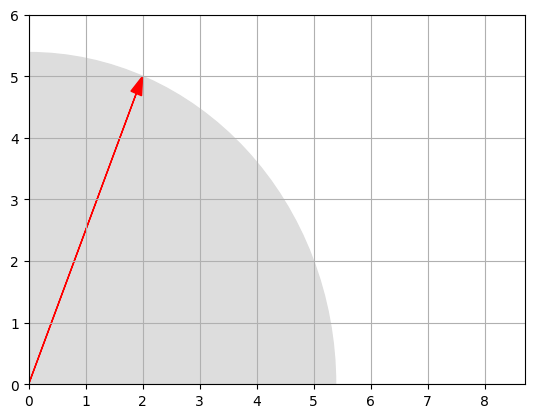

In [40]:
radius = linear_algebra.norm(v1)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
show_vector_2d_like_arrows(v1, color="r")
plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

## Adición


In [41]:
w = np.array ( [ 4, 2 ] )
v = np.array ( [ 2, 5 ] )
u = np.array ( [ 3, 1 ] )

La suma de vectores se vería gráficamente de la siguiente forma:

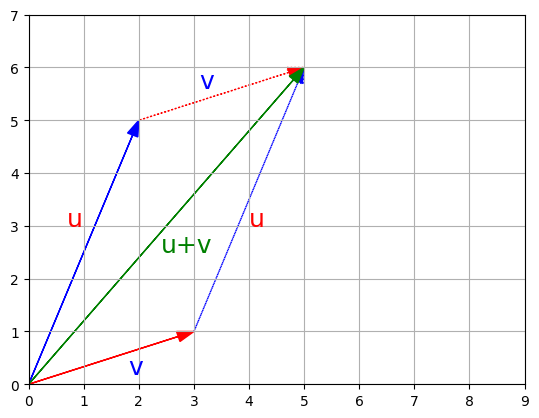

In [42]:
show_vector_2d_like_arrows(u, color="r")
show_vector_2d_like_arrows(v, color="b")
show_vector_2d_like_arrows(v, origin=u, color="b", linestyle="dotted")
show_vector_2d_like_arrows(u, origin=v, color="r", linestyle="dotted")
show_vector_2d_like_arrows(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

## Vectores nulos, unitarios y normalizados
- Un vector nulo es un vector lleno de ceros
- Un vector unitario es un vector con una norma igual a 1
- El vector normalizado de un vector no nulo $u$, anotado $\hat{u}$, es el vector unitario que apunta en la misma dirección que $u$. Este es igual a: $\hat{u} = \displaystyle \frac{u}{||u||}$

<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Zkorpion\AppData\Local\Temp\ipykernel_5648\2643458291.py:5: SyntaxWarning: invalid escape sequence '\h'
  plt.text(0.3, 0.3, "$\hat{u}$", color="k", fontsize=18)


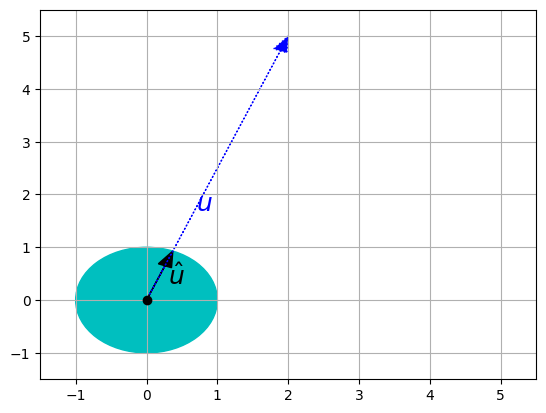

In [46]:
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")
show_vector_2d_like_arrows(v / linear_algebra.norm(v), color="k")
show_vector_2d_like_arrows(v, color="b", linestyle=":")
plt.text(0.3, 0.3, "$\hat{u}$", color="k", fontsize=18)
plt.text(0.7, 1.7, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 5.5])
plt.grid()
plt.show()

PENDIENTE
- Producto escalar
- Calculo del angulo entre vectores
- Proyeccion de un punto sobre un eje
- 